
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> "No-show appointments" dataset contains information from 100,000 medical appointments in Brazil and is focused on the question of whether or no patients show up for their appointment.

> RESEARCH QUESTION:
> 1. What is the number of patients that show up?
> 2. What gender show up most?
> 3. Is SMS recieved a factor for patient to show up?
> 4. Is scholarship a factor to consider for patient to show up?
> 5. What is effect of scholarship and gender on patients that show up?

In [1]:
# import python packages for the analysis of this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load dataset 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# view the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# checck the data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> 1. The dataset has 110527 ROWS and 14 COLUMNS
> 2. No missing values
> 3. ApplicationID, PatientId, ScheduledDay, AppointmentDay, Neighbourhood, Age, Handcap, Hipertension, Diabetes, Alcoholism will be dropped, it's not needed due to my research question.
> 4. For readability, Column labels need to be rewritten

In [4]:
# view unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> 1. SMS_received has 2 unique values which are 0 and 1. It will be more readable as False and True respectively.
> 2. Gender has 2 unique values which are F and M, for readability, It should be replace as Female and Male respectively

In [5]:
# statistical view of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> min age of -1 which is not valid. the column is not required for my analyses and will be dropped as stated above earlier

### Data Cleaning (Replace this with more specific notes!)

In [6]:
# dropping of columns that are not required for my analysis as written in No 3 above.
df.drop(df[['PatientId','AppointmentID','Age','ScheduledDay','AppointmentDay','Neighbourhood','Alcoholism',
            'Hipertension','Diabetes','Handcap']],axis=1, inplace=True)

In [7]:
# view the dataset for changes
df.head()

,Gender,Scholarship,SMS_received,No-show
0,F,0,0,No
1,M,0,0,No
2,F,0,0,No
3,F,0,0,No
4,F,0,0,No


In [8]:
# to rewrite column name for readability
label = ['Gender','Scholarship','SMS_received','No-show']

# function to loop and rewrite name
for x in label:
    df.rename(columns = lambda x: x.lower().replace('-','_'), inplace=True)

In [9]:
# view dataset for changes
df.head()

,gender,scholarship,sms_received,no_show
0,F,0,0,No
1,M,0,0,No
2,F,0,0,No
3,F,0,0,No
4,F,0,0,No


In [10]:
# to change hipertension, diabetes, alcolism to true and false by changing the data type from int to bool
df.loc[:,'scholarship':'sms_received'] = df.loc[:,'scholarship':'sms_received'].astype(bool)

In [11]:
# to rename F as Female and M as Male
df.gender = df.gender.replace({'F':'Female','M':'Male'})

In [12]:
# view dataset for changes
df.head()

,gender,scholarship,sms_received,no_show
0,Female,False,False,No
1,Male,False,False,No
2,Female,False,False,No
3,Female,False,False,No
4,Female,False,False,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What is the number of patients that show up?)

In [13]:
# number of patients that show up and no show up
pd.DataFrame(df['no_show'].value_counts(normalize=True).rename('no_show_count'))

,no_show_count
No,0.798067
Yes,0.201933


>> function to plot graph for visualization of outcomes

In [14]:
# function to view plots using  matplotlib.pyplot
def plot_view(dfr,kind='hist',color=['red','green'],xlabel='',ylabel='',title=''):
    dfr.plot(kind=kind, color=color, stacked=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 

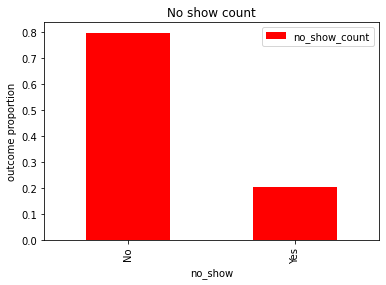

In [15]:
# to view the plot of proportion of patients that show up and did not show up
no_show_count = pd.DataFrame(df['no_show'].value_counts(normalize=True).rename('no_show_count'))
plot_view(no_show_count,kind='bar', title='No show count',xlabel='no_show',ylabel='outcome proportion');

>> **About 80% Patients show up for their appointmemts**

### Research Question 2  (What gender show up most and effect on patients that show up?)

In [16]:
# proportion of male and female in the dataset
gender_count = df.gender.value_counts(normalize=True)
gender_count

Female    0.649977
Male      0.350023
Name: gender, dtype: float64

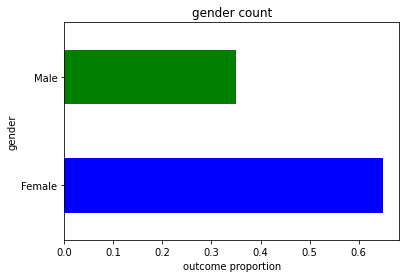

In [17]:
# to view plot for the proportion of gender that show up
plot_view(gender_count,kind='barh', title='gender count',xlabel='outcome proportion',
          ylabel='gender',color=['blue','green']);

>> **This show that more female patients are in the dataset, over 60% female**

In [18]:
# proportion of gender that show up most
bygender = df.groupby(['gender'])['no_show'].value_counts(normalize=True).rename('no_show_count').unstack()
bygender

no_show,No,Yes
gender,,
Female,0.796854,0.203146
Male,0.800321,0.199679


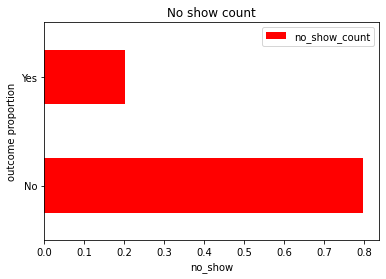

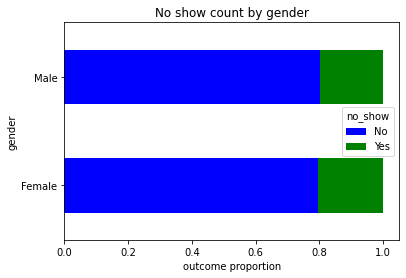

In [19]:
# to view the plot of proportion of no show
plot_view(no_show_count,kind='barh', title='No show count',xlabel='no_show',ylabel='outcome proportion')

# to view the plot of proportion of gender that show up most
plot_view(bygender,kind='barh', title='No show count by gender',xlabel='outcome proportion',
          ylabel='gender',color=['blue','green']);

>> 1. **almost equal number of gender show up, however from the gender count plot, more male proportion in the dataset show up than female**
>> 2. **looking at the no show count and no show count by gender, gender has no effect on the patients that show up**

### Research Question 3 (Is SMS recieved a factor for patient to show up?)

In [20]:
# sms received proportion
sms_count = pd.DataFrame(df.sms_received.value_counts(normalize=True).rename('sms_count'))
sms_count

,sms_count
False,0.678974
True,0.321026


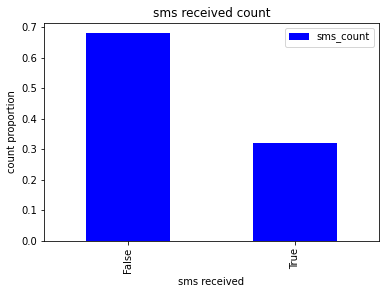

In [21]:
# to view plot for proportion of sms received
plot_view(sms_count,kind='bar', title='sms received count',xlabel='sms received',
          ylabel='count proportion',color=['blue','green']);

>> **about 30% of the patients received sms and about 70% did not receive sms**

In [22]:
# no_show proportion by sms received
bysms_count = df.groupby(['sms_received'])['no_show'].value_counts(normalize=True).unstack()
bysms_count

no_show,No,Yes
sms_received,,
False,0.832967,0.167033
True,0.724255,0.275745


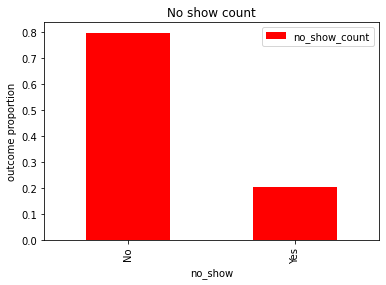

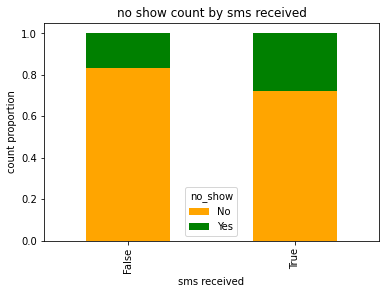

In [23]:
# to view the plot for no_show proportion
plot_view(no_show_count,kind='bar', title='No show count',xlabel='no_show',ylabel='outcome proportion');

# to view plot for no_show by sms_received counts
plot_view(bysms_count,kind='bar', title='no show count by sms received',xlabel='sms received',
          ylabel='count proportion',color=['orange','green']);

>> **This indicate that patients that received sms show up more than those that did not receive sms, about 30% received sms and about 70% of the 30% show up**

### Research Question 4 (Is scholarship a factor to consider for patient to show up?)

In [24]:
# scholarship proportion
schship_count = pd.DataFrame(df['scholarship'].value_counts(normalize=True).rename('scholarship_count'))
schship_count

,scholarship_count
False,0.901734
True,0.098266


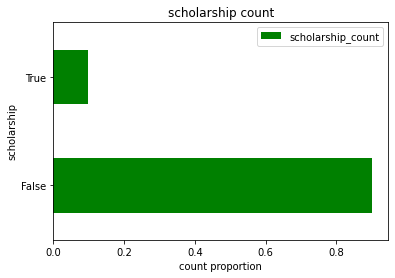

In [25]:
# to view plot for proportion of scholarship patients
plot_view(schship_count,kind='barh', title='scholarship count',xlabel='count proportion',
          ylabel='scholarship',color=['green']);

>> **Few patients benefit from scholarship, about 10%**

In [26]:
# no_show proportion by scholarship
byschship = df.groupby('scholarship')['no_show'].value_counts(normalize=True).unstack()
byschship

no_show,No,Yes
scholarship,,
False,0.801928,0.198072
True,0.762637,0.237363


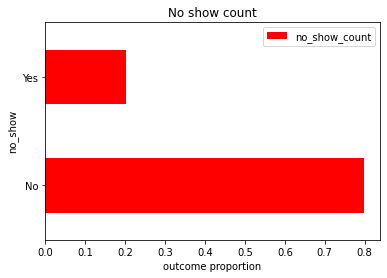

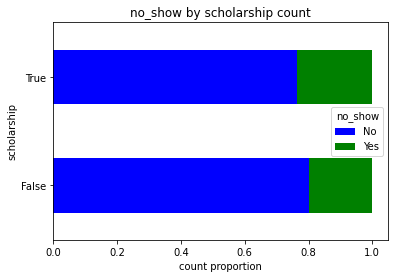

In [27]:
# to view the plot for no_show proportion
plot_view(no_show_count,kind='barh', title='No show count',xlabel='outcome proportion',ylabel='no_show');

# to view plot no_show by scholarship count
plot_view(byschship,kind='barh', title='no_show by scholarship count',xlabel='count proportion',
          ylabel='scholarship',color=['blue','green']);

>> **This indicate that more scholarship patients show up for their appointents**

### Research Question 5  (What is effect of scholarship and gender on patients that show up?)

In [28]:
# no_show proportion by gender and scholarship
bygen_sch = df.groupby(['gender','scholarship'])['no_show'].value_counts(normalize=True).unstack()
bygen_sch

no_show                   No       Yes
gender scholarship                    
Female False        0.801737  0.198263
       True         0.762115  0.237885
Male   False        0.802257  0.197743
       True         0.764940  0.235060

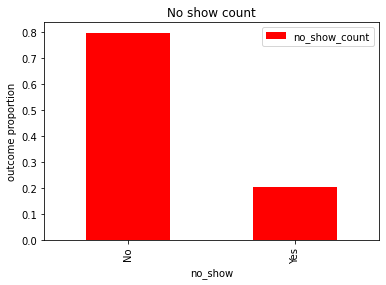

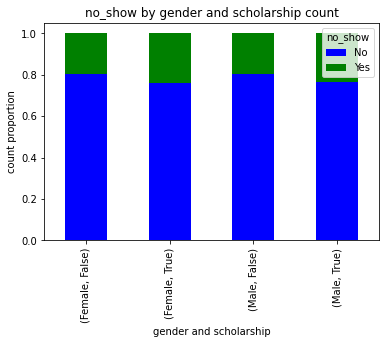

In [29]:
# to view the plot for no_show proportion
plot_view(no_show_count,kind='bar', title='No show count',xlabel='no_show',ylabel='outcome proportion');

# to view plot for no_show by gender and scholarship
plot_view(bygen_sch,kind='bar', title='no_show by gender and scholarship count',xlabel='gender and scholarship',
          ylabel='count proportion',color=['blue','green']);

>> **There is no significant effect, however, Male patients that are on scholarship show up more**

<a id='conclusions'></a>
## Conclusions

>> From all the analysis above,it could be deduced that 80% of the patients show up for their appointments and most Male Patients in the dataset show up while least to proportion of females in the dataset show up for their appoinments. Most patients that receive sms show up for their appoinment and most on scholarship show up for their appointment. Hence, gender, sms and scholarship are factors to predict the number of patient that will show up more for their appointment.

>> *limitation:*  It is not detailed if the scholarship cover all patients treatment or it only cover part of their treatements. ALso, it is not stated if sms were sent to all patients or only sent to those that received it.
>>> *improvement:* Scholarship full details should be provided by stating if it is a full scholarship that covers all treatments or just part of patients treatments. Also it should be stated if sms were sent to all patients.
